<h3>Steps</h3>
<ol>
  <li>Perform Exploratory Data Analysis</li>
  <li>Make time series data Stationary</li>
  <li>Plot the correlation and autocorrelation charts</li>
   <li>Construct the seasonal Model based on the ARIMA</li>
      <li>Make predictions using the model</li>
</ol>
ARIMA(Auto Regressive Integrated moving Average)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df=pd.read_csv("/perrin-freres-monthly-champagne-.csv")

In [12]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [13]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [14]:
df.columns=['Month','Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [15]:
#dropping the Nan and Misplaced Records
df.drop(106,axis=0,inplace=True)
df.drop(105,axis=0,inplace=True)

In [16]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [17]:
df['Month']=pd.to_datetime(df['Month'])
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [18]:
df.set_index('Month',inplace=True)

In [19]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [20]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot: xlabel='Month'>

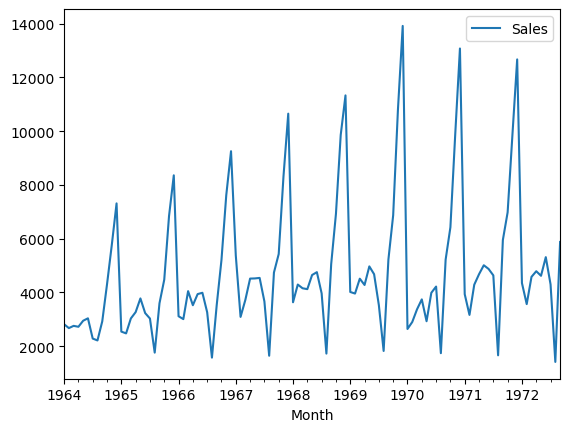

In [21]:
df.plot()

<h3>The data has seasonal format</h3>

<h3>Checking if the data is stationary</h3>
<ul>
  <li>The requirements for data to be stationary are :</li>
   <li>The mean should be constant </li>
      <li>The standard deviation should be constant  for a rolling window</li>
</ul>

<h3>To check the conditins we use the dicky fuller test</h3>


In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
test_result=adfuller(df['Sales'])

In [24]:
#H0->It is non stationary
#H1->It is stationary
def adfuller_test(sales):
    result=adfuller(sales)
    labels=['ADF Test Statistics','p-value','#Lags used','Number of Observations used']
    for value ,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1]<=0.005:
            print("Strong evidence against the null hypothesis , reject the null hypothesis,Data  is  stationary ")
    else:
            print("Weak evidence against the null hypothesis , accept the null hypothesis ,Data  is NOT stationary")
        

In [25]:
adfuller_test(df['Sales'])

ADF Test Statistics : -1.8335930563276177
p-value : 0.3639157716602475
#Lags used : 11
Number of Observations used : 93
Weak evidence against the null hypothesis , accept the null hypothesis ,Data  is NOT stationary


<h3>Differencing</h3>

In [26]:
#df['Sales First Difference']=df['Sales']-df['Sales'].shift(1)


In [27]:
#Data has a certain repeating pattern
#So we need to also shift by some other number->Seasonal difference
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [28]:
df.head(14)

,Sales,Seasonal First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [29]:
#Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())



ADF Test Statistics : -7.626619157213164
p-value : 2.060579696813685e-11
#Lags used : 0
Number of Observations used : 92
Strong evidence against the null hypothesis , reject the null hypothesis,Data  is  stationary 


<AxesSubplot: xlabel='Month'>

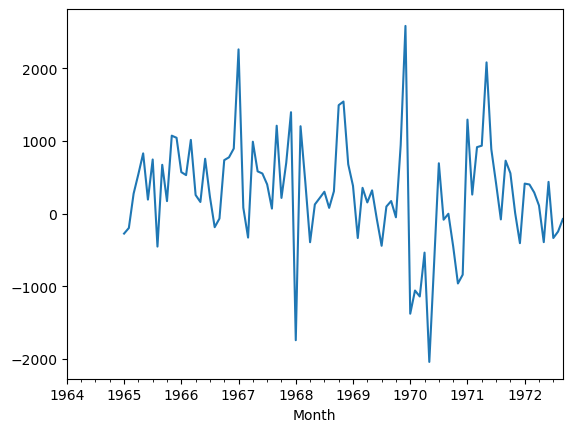

In [30]:
df['Seasonal First Difference'].plot()

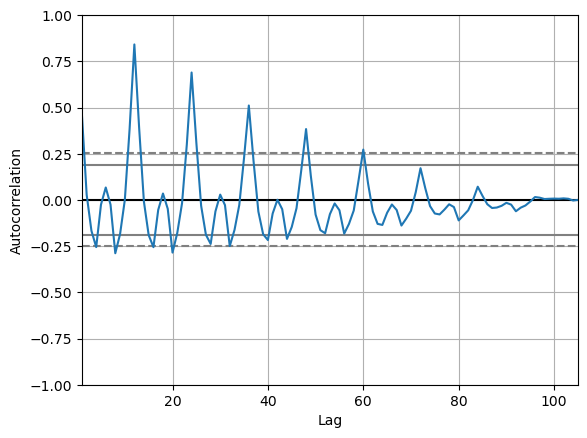

In [31]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

<h3>Final Thoughts on Autocorrelation and Partial Autocorrelation</h3>
Identification of an AR model is often best done with the PACF.

For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF. p,d,q

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
p AR model lags d differencing q MA lags

In [37]:

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm


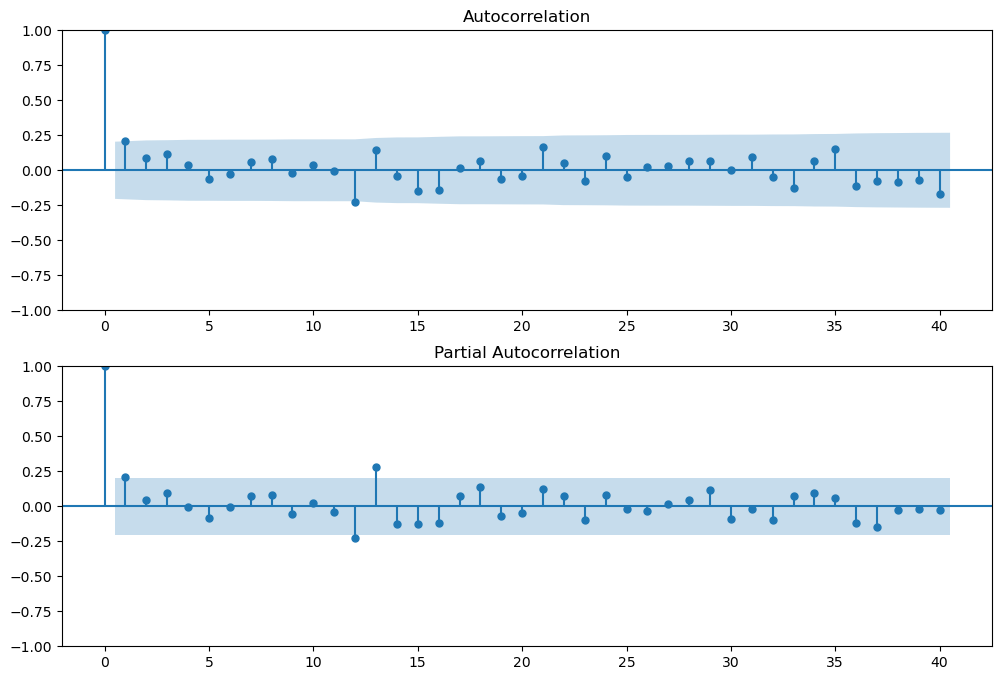

In [38]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [43]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model=sm.tsa.ARIMA(df['Sales'],order=(1,1,1))

/Users/arshhmansuri/tensorflow-test/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/arshhmansuri/tensorflow-test/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/arshhmansuri/tensorflow-test/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [44]:
model_fit=model.fit()

In [45]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Tue, 16 Apr 2024   AIC                           1911.627
Time:                        18:59:27   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: xlabel='Month'>

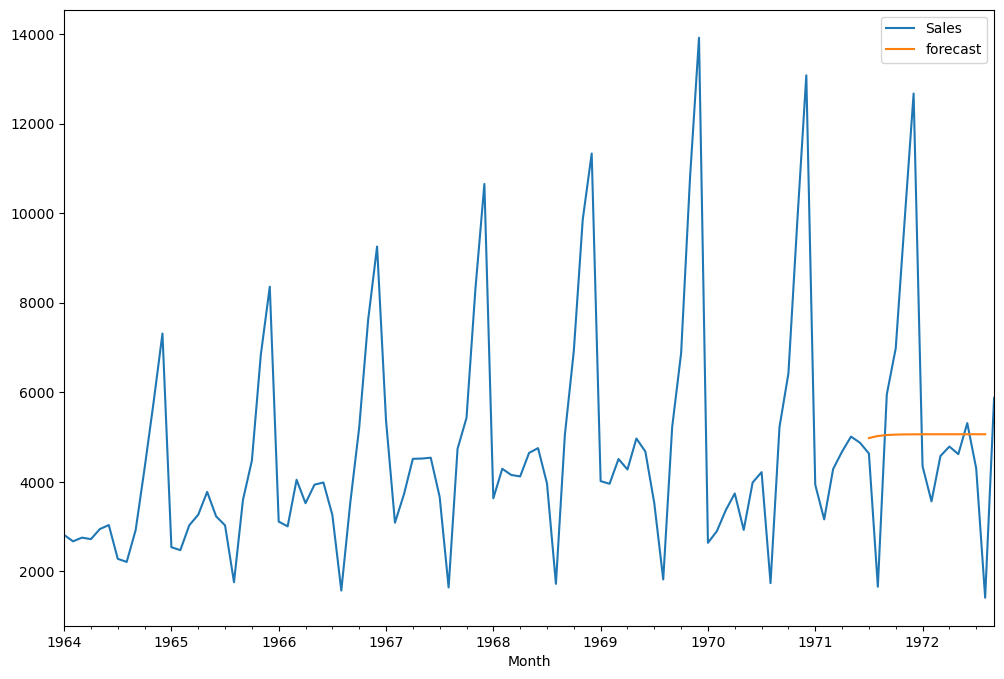

In [46]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [47]:
import statsmodels.api as sm


In [48]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/Users/arshhmansuri/tensorflow-test/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/arshhmansuri/tensorflow-test/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07295D+00    |proj g|=  4.80911D-02

At iterate    5    f=  7.04942D+00    |proj g|=  1.53381D-02

At iterate   10    f=  7.04713D+00    |proj g|=  2.99460D-04

At iterate   15    f=  7.04708D+00    |proj g|=  5.05910D-03

At iterate   20    f=  7.04413D+00    |proj g|=  1.18415D-02

At iterate   25    f=  7.03252D+00    |proj g|=  1.06271D-03

At iterate   30    f=  7.03240D+00    |proj g|=  5.56816D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

<AxesSubplot: xlabel='Month'>

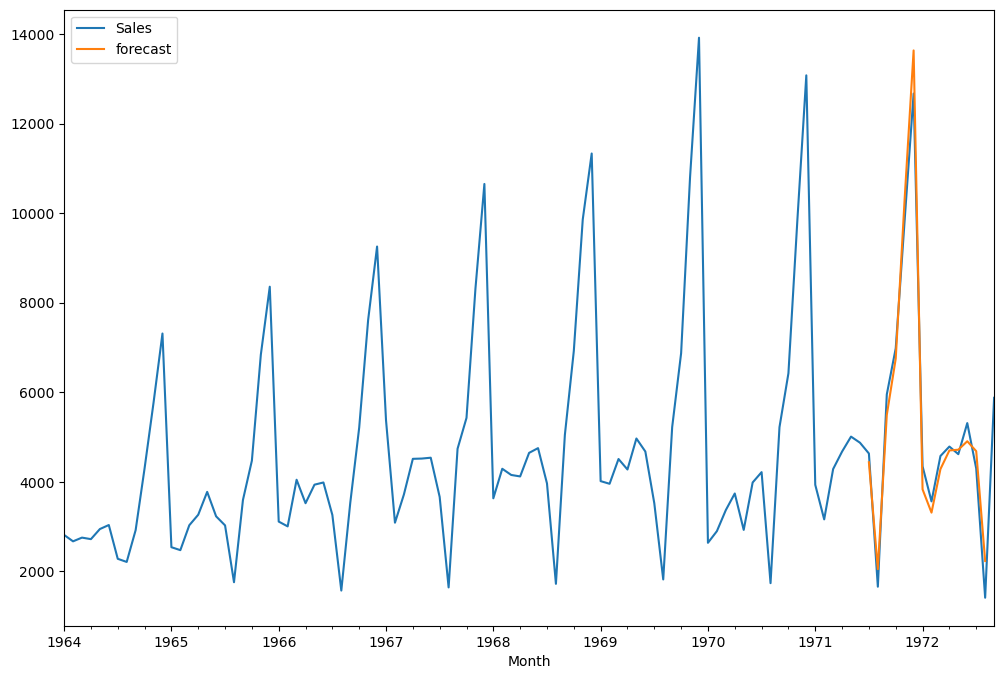

In [49]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [50]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [51]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)


In [52]:
future_datest_df.tail()


,Sales,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN


In [53]:
future_df=pd.concat([df,future_datest_df])


<AxesSubplot: >

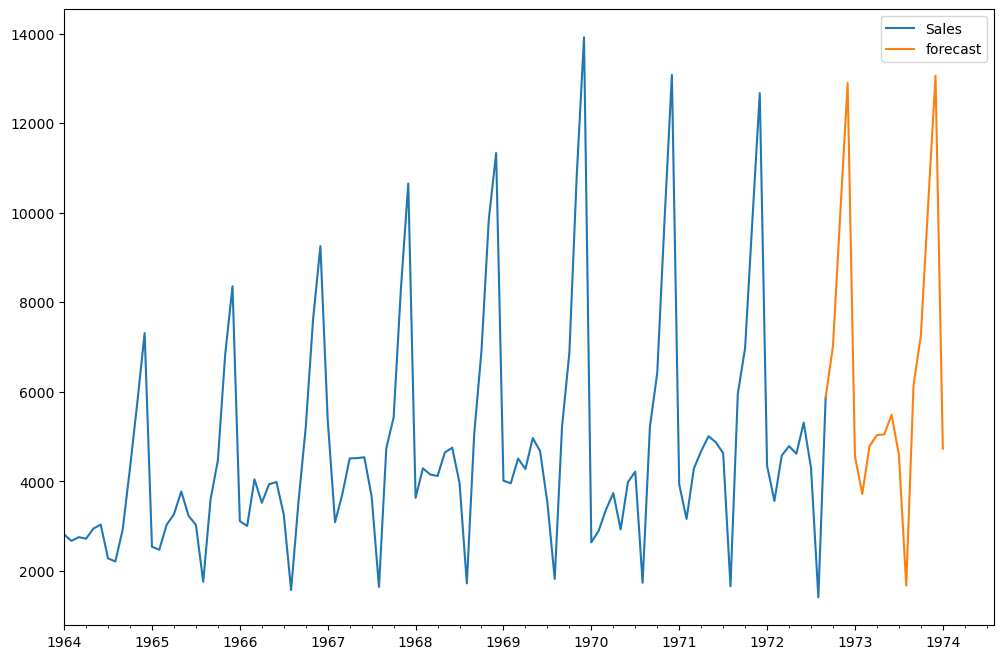

In [54]:
future_df=pd.concat([df,future_datest_df])
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 